In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import matplotlib.patches as mpatches
from scipy.stats import norm


In [2]:
# function to convert to superscript
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

def nansem(a, axis=1):
    return np.nanstd(a, axis=0)/np.sqrt(a.shape[axis])

In [3]:
syllable_feature_fitting_time_lag = loadmat("processed_data/syllable_feature_fitting_time_lag.mat")
lag_pr2_v_long = syllable_feature_fitting_time_lag['lag_pr2_v_long']
lag_pr2_c_long = syllable_feature_fitting_time_lag['lag_pr2_c_long']

In [5]:
lag_pr2_v_long.shape

(4, 401, 5)

In [6]:
lag_pr2_c_long.shape

(8, 401, 5)

In [4]:
lag_pr2_v_long[0]

array([[-5.00000000e-01,  1.12424169e-02,  8.34041339e-03,
         0.00000000e+00,  0.00000000e+00],
       [-4.90000000e-01,  1.12836457e-02,  7.27010453e-03,
         0.00000000e+00,  0.00000000e+00],
       [-4.80000000e-01,  1.14445806e-02,  6.37095077e-03,
         1.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.48000000e+00,  1.54129845e-02,  2.16738170e-03,
         1.00000000e+00,  0.00000000e+00],
       [ 3.49000000e+00,  1.38342309e-02,  1.97759540e-03,
         1.00000000e+00,  0.00000000e+00],
       [ 3.50000000e+00,  1.26856525e-02,  1.84096760e-03,
         1.00000000e+00,  0.00000000e+00]])

In [7]:
np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])).mean(axis=0).shape

(401,)

In [8]:
np.linspace(-0.5, 3.5, 401)

array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
       -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
       -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24,
       -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15,
       -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
       -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
        0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,
        0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,
        0.22,  0.23,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,
        0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.37,  0.38,  0.39,
        0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,  0.46,  0.47,  0.48,
        0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,  0.55,  0.56,  0.57,
        0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,  0.64,  0.65,  0.66,
        0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,  0.73,  0.74,  0.75,
        0.76,  0.77,

In [9]:
np.array(lag_pr2_v_long)[0, :, 0]

array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
       -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
       -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24,
       -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15,
       -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
       -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
        0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,
        0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,
        0.22,  0.23,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,
        0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.37,  0.38,  0.39,
        0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,  0.46,  0.47,  0.48,
        0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,  0.55,  0.56,  0.57,
        0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,  0.64,  0.65,  0.66,
        0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,  0.73,  0.74,  0.75,
        0.76,  0.77,

In [10]:
axs.get_xticks()

NameError: name 'axs' is not defined

In [11]:
np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])).shape

(8, 401)

In [12]:
line.get_color()

NameError: name 'line' is not defined

In [20]:
p.g

In [56]:
np.array(lag_pr2_v_long)[:, :, 1].shape
np.array(lag_pr2_c_long)[:, :, 1].shape

(4, 401)

(4, 401)

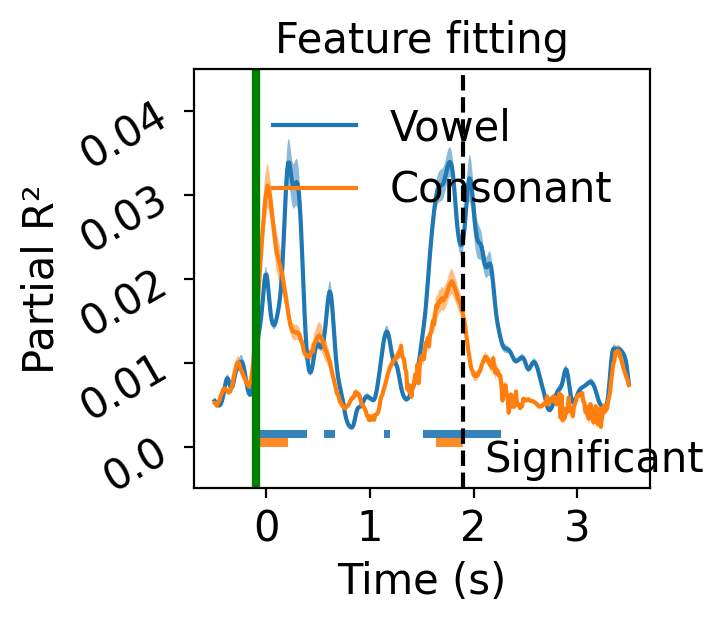

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(3.5, 3), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

time_point = np.linspace(-0.5, 3.5, 401)

mean = np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])).mean(axis=0)
sem = nansem(np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])))
line, = axs.plot(time_point, mean, label='Vowel')
axs.fill_between(time_point, mean-sem, mean+sem, alpha=0.5)

rest_time = mean[:45]
mu, std = norm.fit(rest_time) 
sig_diff = mu+1.96*std
for item in range(len(time_point)):
    if mean[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item/100-0.5, 
                                                   0.001), 
                                                  0.01, 0.001, color=line.get_color(), 
                                                  alpha=0.9, ec=None))

mean = np.concatenate((np.array(lag_pr2_c_long)[:, :, 1], np.array(lag_pr2_c_long)[:, :, 2])).mean(axis=0)
sem = nansem(np.concatenate((np.array(lag_pr2_c_long)[:, :, 1], np.array(lag_pr2_c_long)[:, :, 2])))
line, = axs.plot(time_point, mean, label='Consonant')
axs.fill_between(time_point, mean-sem, mean+sem, alpha=0.5)
axs.set_xlabel('Time (s)', fontsize=15)
axs.set_ylabel(f"Partial R{get_super('2')}", fontsize=15)

rest_time = mean[:45]
mu, std = norm.fit(rest_time) 
sig_diff = mu+1.96*std
for item in range(len(time_point)):
    if mean[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item/100-0.5, 
                                                   0), 
                                                  0.01, 0.001, color=line.get_color(), 
                                                  alpha=0.9, ec=None))

plt.legend(fontsize=15, frameon=0)
axs.set_title(f"Feature fitting", fontsize=15)
axs.axvline(-0.1, color='g', linewidth=3)
axs.axvline(1.9, color='k', linestyle='--')

axs.set_xticklabels([0, 0, 1, 2, 3], fontsize=15)
axs.set_yticklabels([round(item, 3) for item in axs.get_yticks()], fontsize=15, rotation=30)
axs.set_ylim(-0.005, 0.045)
axs.text(2.1, -0.003, 'Significant', fontsize = 15)

plt.savefig("../plots/fig2e.svg", format = 'svg', dpi=200);


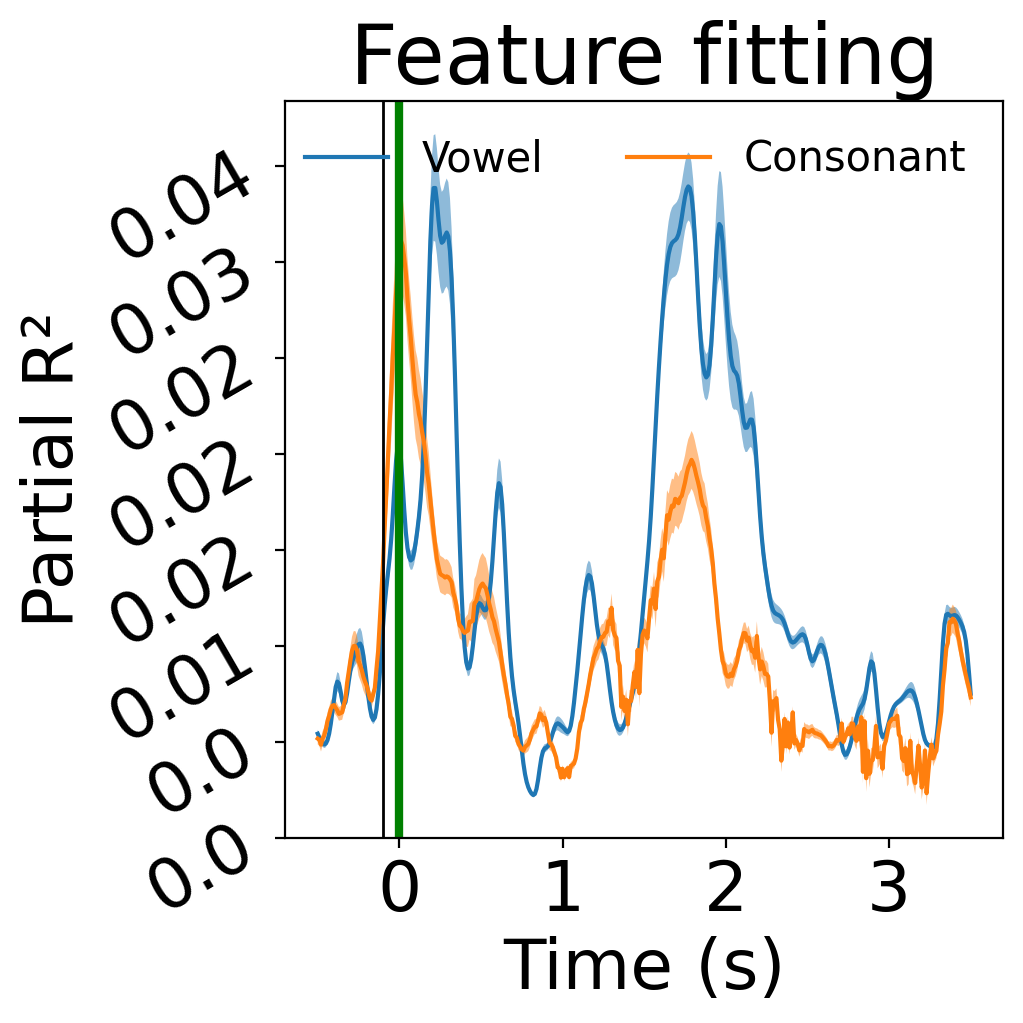

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)

time_point = np.linspace(-0.5, 3.5, 401)

mean = np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])).mean(axis=0)
sem = nansem(np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])))
axs.plot(time_point, mean, label='Vowel')
axs.fill_between(time_point, mean-sem, mean+sem, alpha=0.5)

mean = np.concatenate((np.array(lag_pr2_c_long)[:, :, 1], np.array(lag_pr2_c_long)[:, :, 2])).mean(axis=0)
sem = nansem(np.concatenate((np.array(lag_pr2_c_long)[:, :, 1], np.array(lag_pr2_c_long)[:, :, 2])))
axs.plot(time_point, mean, label='Consonant')
axs.fill_between(time_point, mean-sem, mean+sem, alpha=0.5)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel(f"Partial R{get_super('2')}", fontsize=25)

plt.legend(fontsize=15, ncol=2, frameon=0)
axs.set_title(f"Feature fitting", fontsize=30)
axs.axvline(0, color='g', linewidth=3)
axs.axvline(-0.1, color='k', linewidth=1)

axs.set_xticklabels([0, 0, 1, 2, 3], fontsize=25)
axs.set_yticklabels([round(item, 2) for item in axs.get_yticks()], fontsize=25, rotation=30)
plt.plot();

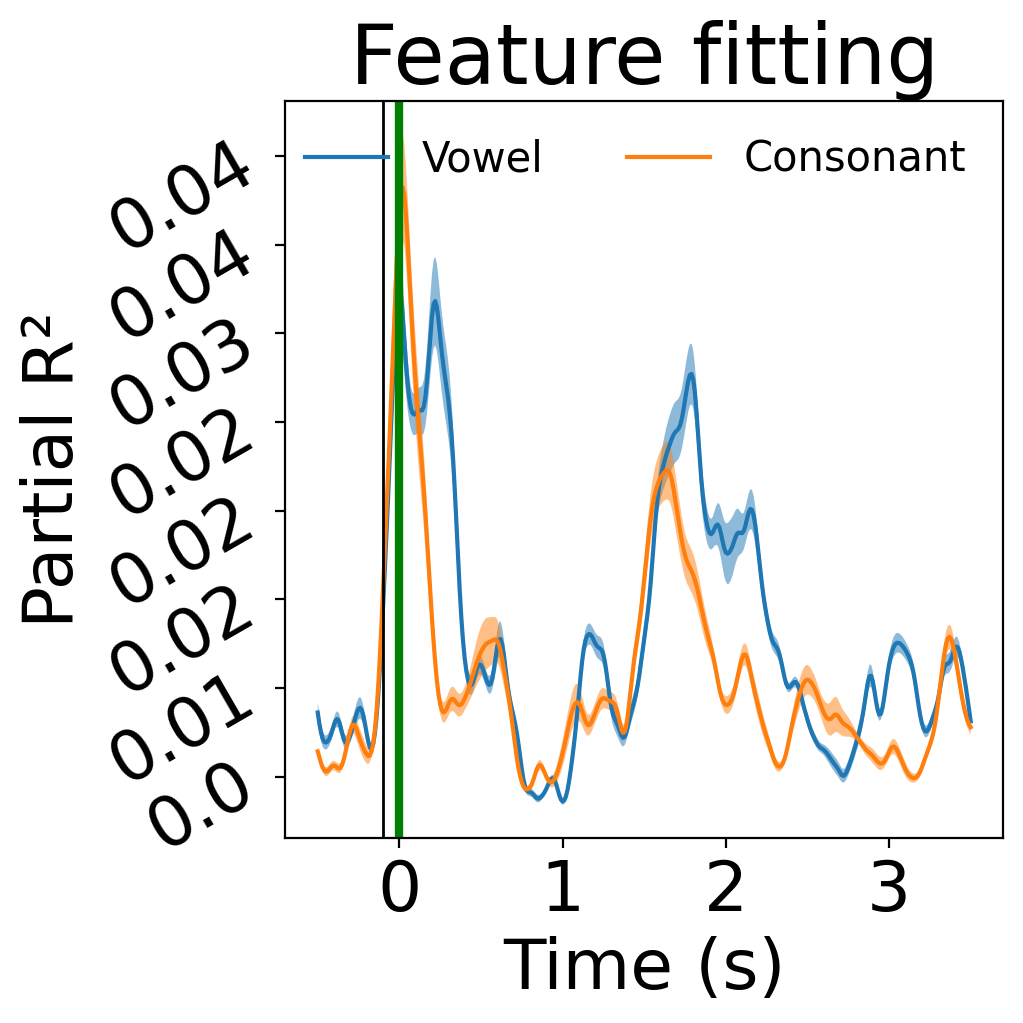

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)

time_point = np.linspace(-0.5, 3.5, 401)

mean = np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])).mean(axis=0)
sem = nansem(np.concatenate((np.array(lag_pr2_v_long)[:, :, 1], np.array(lag_pr2_v_long)[:, :, 2])))
axs.plot(time_point, mean, label='Vowel')
axs.fill_between(time_point, mean-sem, mean+sem, alpha=0.5)

mean = np.concatenate((np.array(lag_pr2_c_long)[:, :, 1], np.array(lag_pr2_c_long)[:, :, 2])).mean(axis=0)
sem = nansem(np.concatenate((np.array(lag_pr2_c_long)[:, :, 1], np.array(lag_pr2_c_long)[:, :, 2])))
axs.plot(time_point, mean, label='Consonant')
axs.fill_between(time_point, mean-sem, mean+sem, alpha=0.5)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel(f"Partial R{get_super('2')}", fontsize=25)

plt.legend(fontsize=15, ncol=2, frameon=0)
axs.set_title(f"Feature fitting", fontsize=30)
axs.axvline(0, color='g', linewidth=3)
axs.axvline(-0.1, color='k', linewidth=1)

axs.set_xticklabels([0, 0, 1, 2, 3], fontsize=25)
axs.set_yticklabels([round(item, 2) for item in axs.get_yticks()], fontsize=25, rotation=30)
plt.plot();

In [18]:
lag_pr2_v_long.shape
lag_pr2_c_long.shape

(4, 401, 5)

(8, 401, 5)

In [29]:
syllable_time_lag = loadmat("processed_data/syllable_feature_fitting_time_lag_new.mat")
lag_pr2_v_long = syllable_time_lag['lag_pr2_v_long']
lag_pr2_c_long = syllable_time_lag['lag_pr2_c_long']

In [8]:
syllable_time_lag

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 23 07:20:54 2024',
 '__version__': '1.0',
 '__globals__': [],
 'lag_pr2_v_long': array([[[-5.00000000e-01,  1.24614036e-02,  9.34381850e-03,
           1.00000000e+00,  0.00000000e+00],
         [-4.90000000e-01,  1.23649212e-02,  8.38885820e-03,
           1.00000000e+00,  0.00000000e+00],
         [-4.80000000e-01,  1.23166003e-02,  7.58379198e-03,
           1.00000000e+00,  0.00000000e+00],
         ...,
         [ 3.48000000e+00,  1.10118085e-02,  3.17394765e-03,
           1.00000000e+00,  1.00000000e+00],
         [ 3.49000000e+00,  9.90333294e-03,  2.89791685e-03,
           1.00000000e+00,  0.00000000e+00],
         [ 3.50000000e+00,  9.14009566e-03,  2.65176216e-03,
           1.00000000e+00,  0.00000000e+00]],
 
        [[-5.00000000e-01,  4.03060289e-03,  9.61848733e-04,
           1.00000000e+00,  1.00000000e+00],
         [-4.90000000e-01,  4.59982806e-03,  9.22255112e-04,
           1.00000000e+00,

In [11]:
lag_pr2_v_long.shape
lag_pr2_c_long.shape

(6, 401, 5)

(9, 401, 5)

In [18]:
lag_pr2_v_long[:, :, 0]
lag_pr2_v_long.mean(axis=2).shape
lag_pr2_v_long.mean(axis=2)[0]

array([[-0.5 , -0.49, -0.48, ...,  3.48,  3.49,  3.5 ],
       [-0.5 , -0.49, -0.48, ...,  3.48,  3.49,  3.5 ],
       [-0.5 , -0.49, -0.48, ...,  3.48,  3.49,  3.5 ],
       [-0.5 , -0.49, -0.48, ...,  3.48,  3.49,  3.5 ],
       [-0.5 , -0.49, -0.48, ...,  3.48,  3.49,  3.5 ],
       [-0.5 , -0.49, -0.48, ...,  3.48,  3.49,  3.5 ]])

(6, 401)

array([ 1.04361044e-01,  1.06150756e-01,  1.07980078e-01,  1.09872558e-01,
        1.11814680e-01,  1.13762463e-01,  1.15660869e-01,  1.17469445e-01,
        1.19181418e-01,  1.20823512e-01,  1.22435468e-01,  1.24047037e-01,
       -7.43282792e-02, -7.26819956e-02, -7.09993476e-02, -6.92602101e-02,
       -6.74492398e-02, -6.55643916e-02, -6.36184440e-02, -6.16343016e-02,
       -5.96360776e-02, -5.76388029e-02, -5.56429088e-02, -5.36392124e-02,
       -5.16214804e-02, -4.95954876e-02, -4.75770883e-02, -4.55820659e-02,
       -4.36164148e-02, -4.16743721e-02, -3.97439952e-02, -3.78128293e-02,
       -3.58687056e-02, -3.38989943e-02, -3.18919351e-02, -2.98364849e-02,
       -2.77186828e-02, -2.55210018e-02, -2.32304486e-02, -2.08499928e-02,
       -1.84016450e-02, -1.59168211e-02, -1.34212644e-02, -1.09264323e-02,
       -8.43232184e-03, -5.93511882e-03, -3.42961017e-03, -9.06668680e-04,
        1.64614243e-03,  4.23711979e-03,  6.86240175e-03,  9.50288732e-03,
        1.21235414e-02,  

In [30]:
y_axis_v = np.repeat('V', len(lag_pr2_v_long))
y_axis_c = np.repeat('C', len(lag_pr2_c_long))
y_axis_cv = np.concatenate((y_axis_c, y_axis_v))

In [31]:
lag_pr2_v_long = np.array(lag_pr2_v_long)[:, :, 1]
lag_pr2_c_long = np.array(lag_pr2_c_long)[:, :, 1]

In [10]:
rest_time = np.mean(np.concatenate([lag_pr2_v_long, lag_pr2_c_long]), axis=0)[:40]
mu, std = norm.fit(rest_time) 
sig_diff = mu+1.96*std

mu
std
sig_diff

0.00946053352283004

0.0026696154414007486

0.014692979787975506

0.9619876083213159

In [84]:
mu
std

0.21622511738601935

0.38049106680372274

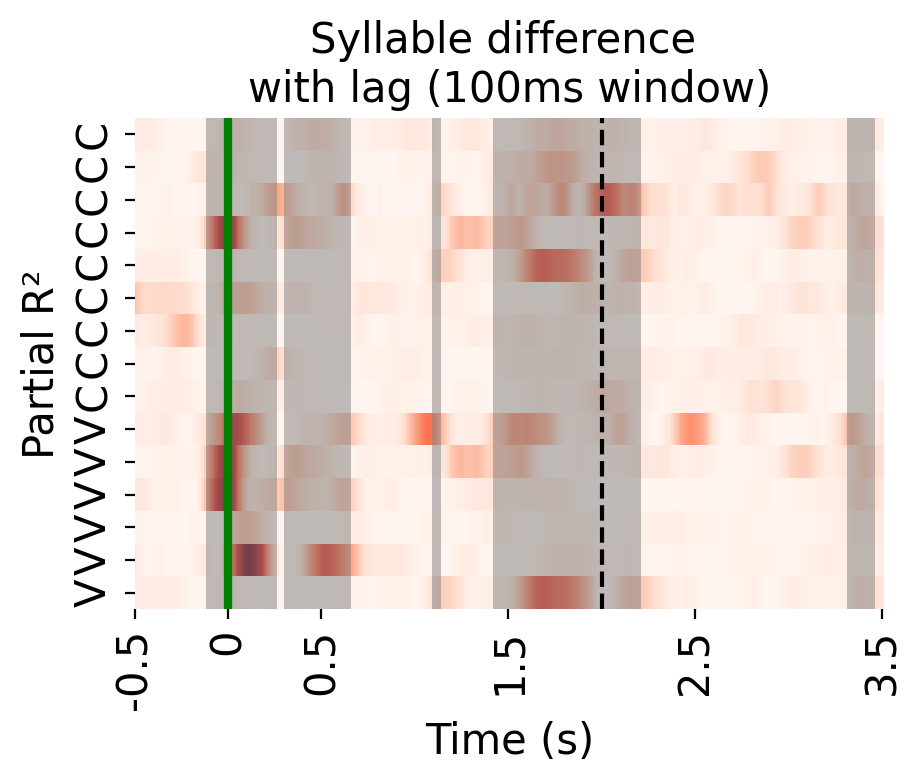

In [12]:
xvals = np.linspace(-0.5, 3.5, 401)


fig, axs = plt.subplots(1, 1, figsize=(4.5, 3.8), dpi=200, constrained_layout=True)
fig.patch.set_alpha(0)

axs.patch.set_alpha(0)
sns.heatmap(np.concatenate([lag_pr2_v_long, lag_pr2_c_long], axis=0), cbar=False, cmap='Reds')
axs.set_xlabel('Time (s)', fontsize=15)
axs.set_title('Syllable difference \nwith lag (100ms window)', fontsize=15)
axs.axvline(50, label='Auditory onset', color='green', linewidth=3)
axs.axvline(250, color='k', linestyle='--', label='Speech onset')
#plt.legend(fontsize=15, frameon=0)
axs.set_xticks([0, 50, 100, 200, 300, 400])
axs.set_xticklabels([-0.5, 0, 0.5, 1.5, 2.5, 3.5], fontsize=15, rotation=90)
axs.set_yticklabels(y_axis_cv, fontsize=15)
axs.set_ylabel(f"Partial R{get_super('2')}", fontsize=15)
#axs.set_xticklabels([round(item, 2) for item in axs.get_xticks()], fontsize=15, rotation=30)

patch_y = axs.get_ylim()[1] - axs.get_ylim()[0]

for item in range(len(xvals)):
    if np.mean(np.concatenate([lag_pr2_v_long, lag_pr2_c_long]), axis=0)[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item, 
                                                   0), 
                                                  1, 15, color='grey', 
                                                  alpha=0.5, ec=None))



#plt.savefig("../plots/fig2c.svg", format = 'svg', dpi=200);
plt.plot();

In [15]:
np.ones(lag_pr2_v_long.shape)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [18]:
total_lag_pr2_long = np.concatenate([lag_pr2_v_long, lag_pr2_c_long], axis=0)
v_mask = np.concatenate([np.ones(lag_pr2_v_long.shape), np.zeros(lag_pr2_c_long.shape)], axis=0)
c_mask = np.concatenate([np.zeros(lag_pr2_v_long.shape), np.ones(lag_pr2_c_long.shape)], axis=0)

total_lag_pr2_long_v = np.ma.masked_array(total_lag_pr2_long, v_mask)
total_lag_pr2_long_c = np.ma.masked_array(total_lag_pr2_long, c_mask)

In [33]:
np.linspace(0, 14, 15)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

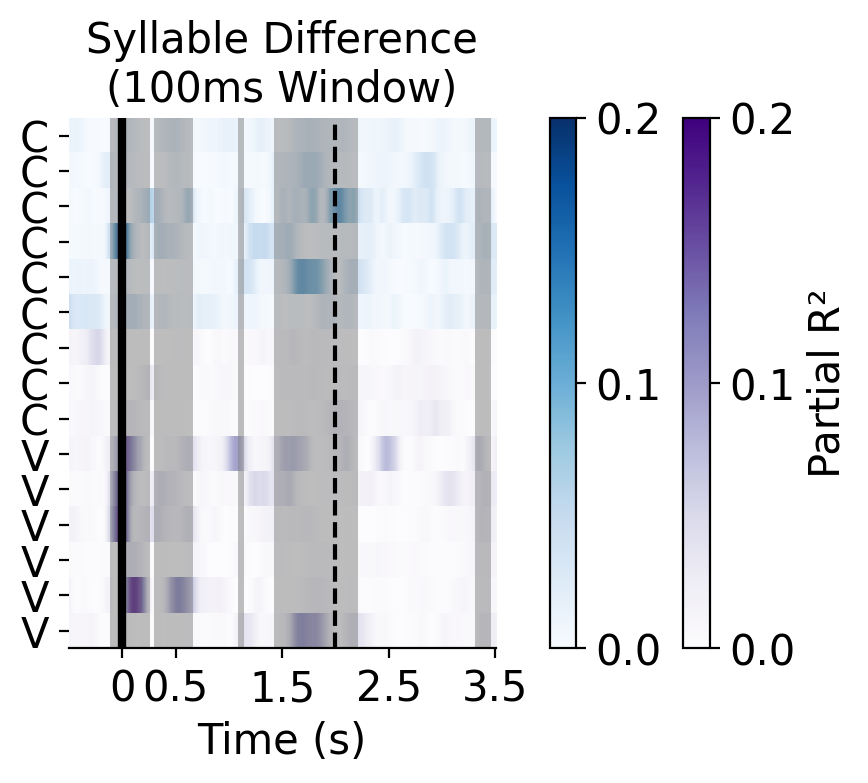

In [36]:
xvals = np.linspace(-0.5, 3.5, 401)


fig, axs = plt.subplots(1, 1, figsize=(4.25, 3.8), dpi=200, constrained_layout=True)
fig.patch.set_alpha(0)

axs.patch.set_alpha(0)

total_lag_pr2_long = np.concatenate([lag_pr2_v_long, lag_pr2_c_long], axis=0)
v_mask = np.concatenate([np.ones(lag_pr2_v_long.shape), np.zeros(lag_pr2_c_long.shape)], axis=0)
c_mask = np.concatenate([np.zeros(lag_pr2_v_long.shape), np.ones(lag_pr2_c_long.shape)], axis=0)

total_lag_pr2_long_v = np.ma.masked_array(total_lag_pr2_long, v_mask)
total_lag_pr2_long_c = np.ma.masked_array(total_lag_pr2_long, c_mask)

img1 = axs.imshow(total_lag_pr2_long_v, cmap='Purples', aspect="auto", 
                  interpolation='none', vmin=0, vmax=0.2)
img2 = axs.imshow(total_lag_pr2_long_c, cmap='Blues', aspect="auto", 
                  interpolation='none', vmin=0, vmax=0.2)

axs.set_xlabel('Time (s)', fontsize=15)
axs.set_title('Syllable Difference\n(100ms Window)', fontsize=15)
axs.axvline(50, label='Auditory Onset', color='k', linewidth=3)
axs.axvline(250, color='k', linestyle='--', label='Speech Onset')
#plt.legend(fontsize=15, frameon=0)
axs.set_xticks([50, 100, 200, 300, 400])
axs.set_xticklabels([0, 0.5, 1.5, 2.5, 3.5], fontsize=15, rotation=0)
axs.set_yticks(np.linspace(0, 14, 15))
axs.set_yticklabels(y_axis_cv, fontsize=15)
#axs.set_ylabel(f"Partial R{get_super('2')}", fontsize=15)
#axs.set_xticklabels([round(item, 2) for item in axs.get_xticks()], fontsize=15, rotation=30)

patch_y = axs.get_ylim()[1] - axs.get_ylim()[0]

for item in range(len(xvals)):
    if np.mean(np.concatenate([lag_pr2_v_long, lag_pr2_c_long]), axis=0)[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item, 
                                                   -0.5), 
                                                  1, 15, color='grey', 
                                                  alpha=0.5, ec=None))

sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)
sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)
cbar1 = plt.colorbar(img1)
cbar2 = plt.colorbar(img2)
cbar1.ax.set_yticks([0, 0.1, 0.2])
cbar2.ax.set_yticks([0, 0.1, 0.2])

cbar1.ax.tick_params(labelsize=15)
cbar2.ax.tick_params(labelsize=15)
cbar1.set_label(f"Partial R{get_super('2')}", fontsize=15)

#plt.savefig("../plots/fig2c.svg", format = 'svg', dpi=200);
plt.plot();

<Axes: >

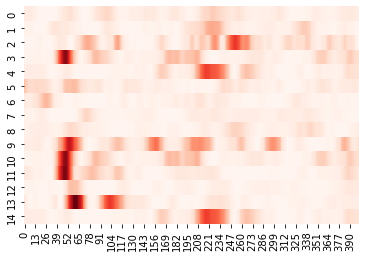

In [59]:
sns.heatmap(np.concatenate([lag_pr2_v_long, lag_pr2_c_long], axis=0), cbar=False, cmap='Reds')


<Axes: >

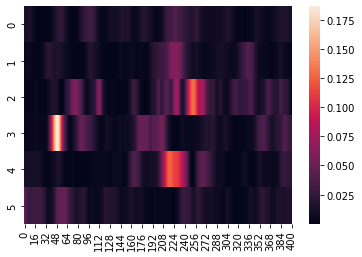

In [56]:
sns.heatmap(np.array(lag_pr2_v_long)[:, :, 1])

<Axes: >

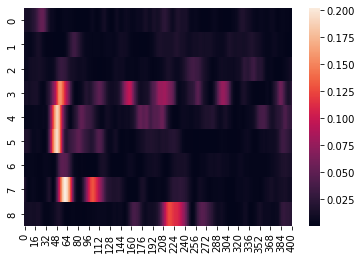

In [57]:
sns.heatmap(np.array(lag_pr2_c_long)[:, :, 1])

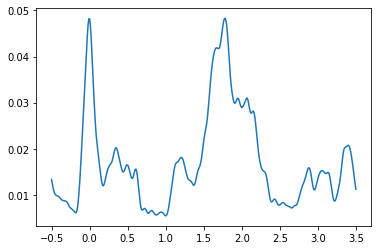

In [54]:
plt.plot(np.array(lag_pr2_v_long)[0, :, 0], np.array(lag_pr2_v_long)[:, :, 1].mean(axis=0), label='consonant')


(6, 401)